In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import time
import numpy as np
import query_db
import composite
import spectral_analysis as sa
import scipy.interpolate as inter
from scipy.special import erf

## Load comparison templates

In [3]:
phase_h, wavelength_hsiao, flux_hsiao = np.loadtxt('../data/info_files/hsiao_template.dat', unpack = True)

In [4]:
epoch_n, wavelength_nugent, flux_nugent = np.loadtxt('../data/info_files/nugent_templates.dat', unpack = True)
epoch_n_91t, wavelength_nugent_91t, flux_nugent_91t = np.loadtxt('../data/info_files/nugent_91t_templates.dat', unpack = True)
epoch_n_91bg, wavelength_nugent_91bg, flux_nugent_91bg = np.loadtxt('../data/info_files/nugent_91bg_templates.dat', unpack = True)

In [5]:
phase_s, wavelength_salt, flux_salt = np.loadtxt('../data/info_files/SALT/salt2-4/salt2_template_0.dat', unpack = True)

In [6]:
t_h, U_h, B_h, V_h, R_h, I_h, Y_h, J_h, H_h, K_h = np.loadtxt('../data/info_files/hsiao_lc_template.dat', unpack = True)

In [7]:
t_n, U_n, B_n, V_n, R_n, I_n, J_n, H_n, K_n = np.loadtxt('../data/info_files/nugent_light_curves.dat', unpack = True)

In [8]:
hsiao_temps = {}
phase_list = []
first = True
for i, phase in enumerate(phase_h):
    if phase not in phase_list:
        phase_list.append(phase)
        if not first:
            hsiao_temps[float(phase_h[i-1])] = [temp_wave, temp_flux]
        temp_wave = [wavelength_hsiao[i]]
        temp_flux = [flux_hsiao[i]]
    else:
        temp_wave.append(wavelength_hsiao[i])
        temp_flux.append(flux_hsiao[i])
    first = False

In [9]:
nug_temps = {}
phase_list = []
first = True
for i, phase in enumerate(epoch_n):
    if phase not in phase_list:
        phase_list.append(phase)
        if not first:
            nug_temps[float(epoch_n[i-1]) - 20.] = [temp_wave, temp_flux]
        temp_wave = [wavelength_nugent[i]]
        temp_flux = [flux_nugent[i]]
    else:
        temp_wave.append(wavelength_nugent[i])
        temp_flux.append(flux_nugent[i])
    first = False

nug_temps_91t = {}
phase_list = []
first = True
for i, phase in enumerate(epoch_n_91t):
    if phase not in phase_list:
        phase_list.append(phase)
        if not first:
            nug_temps_91t[float(epoch_n_91t[i-1]) - 20.] = [temp_wave, temp_flux]
        temp_wave = [wavelength_nugent_91t[i]]
        temp_flux = [flux_nugent_91t[i]]
    else:
        temp_wave.append(wavelength_nugent_91t[i])
        temp_flux.append(flux_nugent_91t[i])
    first = False
    
nug_temps_91bg = {}
phase_list = []
first = True
for i, phase in enumerate(epoch_n_91bg):
    if phase not in phase_list:
        phase_list.append(phase)
        if not first:
            nug_temps_91bg[float(epoch_n_91bg[i-1]) - 20.] = [temp_wave, temp_flux]
        temp_wave = [wavelength_nugent_91bg[i]]
        temp_flux = [flux_nugent_91bg[i]]
    else:
        temp_wave.append(wavelength_nugent_91bg[i])
        temp_flux.append(flux_nugent_91bg[i])
    first = False

In [10]:
salt_temps = {}
phase_list = []
first = True
for i, phase in enumerate(phase_s):
    if phase not in phase_list:
        phase_list.append(phase)
        if not first:
            salt_temps[float(phase_s[i-1])] = [temp_wave, temp_flux]
        temp_wave = [wavelength_salt[i]]
        temp_flux = [flux_salt[i]]
    else:
        temp_wave.append(wavelength_salt[i])
        temp_flux.append(flux_salt[i])
    first = False

## Interpolate templates

In [11]:
wave_h = hsiao_temps[0.][0]
flux_h = hsiao_temps[0.][1]

In [12]:
wave_interp_h = np.arange(1000., 12000., dtype=int, step=2)
flux_spl_h = inter.splrep(wave_h, flux_h)
flux_interp_h = inter.splev(wave_interp_h, flux_spl_h, ext = 3)
h_template = composite.supernova(wave_interp_h, flux_interp_h)
h_template.phase_array = np.zeros(len(flux_interp_h))

In [13]:
wave_n = nug_temps[0.][0]
flux_n = nug_temps[0.][1]

wave_n_91t = nug_temps_91t[0.][0]
flux_n_91t = nug_temps_91t[0.][1]

wave_n_91bg = nug_temps_91bg[0.][0]
flux_n_91bg = nug_temps_91bg[0.][1]

In [14]:
wave_interp_n = np.arange(1000., 12000., dtype=int, step=2)
flux_spl_n = inter.splrep(wave_n, flux_n)
flux_interp_n = inter.splev(wave_interp_n, flux_spl_n, ext = 3)
n_template = composite.supernova(wave_interp_n,flux_interp_n)
n_template.phase_array = np.zeros(len(flux_interp_n))

wave_interp_n_91t = np.arange(1000., 12000., dtype=int, step=2)
flux_spl_n_91t = inter.splrep(wave_n_91t, flux_n_91t)
flux_interp_n_91t = inter.splev(wave_interp_n_91t, flux_spl_n_91t, ext = 3)
n_template_91t = composite.supernova(wave_interp_n_91t,flux_interp_n_91t)
n_template_91t.phase_array = np.zeros(len(flux_interp_n_91t))

wave_interp_n_91bg = np.arange(1000., 12000., dtype=int, step=2)
flux_spl_n_91bg = inter.splrep(wave_n_91bg, flux_n_91bg)
flux_interp_n_91bg = inter.splev(wave_interp_n_91bg, flux_spl_n_91bg, ext = 3)
n_template_91bg = composite.supernova(wave_interp_n_91bg,flux_interp_n_91bg)
n_template_91bg.phase_array = np.zeros(len(flux_interp_n_91bg))

In [15]:
wave_s = salt_temps[0.][0]
flux_s = salt_temps[0.][1]

In [16]:
wave_interp_s = np.arange(1000., 12000., dtype=int, step=2)
flux_spl_s = inter.splrep(wave_s, flux_s)
flux_interp_s = inter.splev(wave_interp_s, flux_spl_s, ext = 3)
s_template = composite.supernova(wave_interp_s, flux_interp_s)
s_template.phase_array = np.zeros(len(flux_interp_s))

## Maximum light - normal Ia composite spectrum

In [17]:
query = ["SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN and phase >= -1 and phase < 1",
         "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -1 and phase <= 1 and ((dm15_source >= 1.02 and dm15_source < 1.24) or (dm15_from_fits >= 1.02 and dm15_from_fits < 1.24)) and Supernovae.SN !='2002bf'"]

In [18]:
composites, sn_arrays, boot_sn_arrays = query_db.main(len(query), query, boot='b', medmean=1, gini_balance = True, verbose=False)

SQL Query: SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN and phase >= -1 and phase < 1
172 questionable files currently ignored
Generate variance failed for:  [u'sn2004dt-20040820-hst.flm']
13 questionable spectra removed 197 spectra left
5 Peculiar Ias removed 192 spectra left
147 spectra with host corrections
172 questionable files currently ignored
99 valid SNe found
Arrays cleaned
3 spectra may have telluric contamination
99 SNs with host corrections
Creating composite...
Gini balancing...
Balanced after 11 iterations
Done.
Bootstrapping
scaling boots...
computing confidence intervals...
SQL Query: SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -1 and phase <= 1 and ((dm15_source >= 1.02 and dm15_source < 1.24) or (dm15_from_fits >= 1.02 and dm15_from_fits < 1.24)) and Supernovae.SN !='2002bf'
172 questionable files currently ignored
Generate variance failed for:  [u'sn2004dt-20040820-hst.flm']
8 ques

C:\Program Files\Anaconda2\lib\site-packages\numpy\lib\nanfunctions.py:703: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


Balanced after 7 iterations
Done.
Bootstrapping
scaling boots...
computing confidence intervals...
v =  10997.3983334
v =  11095.1566954
v_err =  223.49044111
v_err =  441.678843409


In [19]:
query_db.set_min_num_spec(composites, 5)

In [20]:
comps_and_temps = []
for comp in composites:
    comps_and_temps.append(comp)
comps_and_temps.append(h_template)
comps_and_temps.append(n_template)
comps_and_temps.append(s_template)
comps_and_temps, scales = composite.optimize_scales(comps_and_temps, comps_and_temps[2], True)

## Generate photometry from template spectra and compare to template light curves

In [21]:
import pyphot

In [23]:
from pyphot.vega import Vega
vega = Vega()
lib = pyphot.get_library()
f = lib['GROUND_JOHNSON_B']
# compute the integrated flux through the filter f
# note that it work on many spectra at once
fluxes = f.get_flux(vega.wavelength, vega.flux, axis=-1)
# convert to vega magnitudes
mags = -2.5 * np.log10(fluxes) - f.Vega_zero_mag
print("Vega magnitude of Vega in {0:s} is : {1:f} mag".format(f.name, mags))
mags = -2.5 * np.log10(fluxes) - f.AB_zero_mag
print("AB magnitude of Vega in {0:s} is : {1:f} mag".format(f.name, mags))
mags = -2.5 * np.log10(fluxes) - f.ST_zero_mag
print("ST magnitude of Vega in {0:s} is : {1:f} mag".format(f.name, mags))

Vega magnitude of Vega in GROUND_JOHNSON_B is : 0.000000 mag
AB magnitude of Vega in GROUND_JOHNSON_B is : -0.074212 mag
ST magnitude of Vega in GROUND_JOHNSON_B is : -0.587021 mag


In [23]:
lib = pyphot.get_library()
B = lib['GROUND_JOHNSON_B']
V = lib['GROUND_JOHNSON_V']
hsiao_fluxB = B.get_flux(comps_and_temps[2].wavelength, comps_and_temps[2].flux, axis = -1)
hsiao_fluxV = V.get_flux(comps_and_temps[2].wavelength, comps_and_temps[2].flux, axis = -1)
hsiao_magB = -2.5 * np.log10(hsiao_fluxB) - B.Vega_zero_mag
hsiao_magV = -2.5 * np.log10(hsiao_fluxV) - V.Vega_zero_mag
print hsiao_magB, hsiao_magV
hsiao_magB = -2.5 * np.log10(hsiao_fluxB) - B.AB_zero_mag
hsiao_magV = -2.5 * np.log10(hsiao_fluxV) - V.AB_zero_mag
print hsiao_magB, hsiao_magV

-0.0387656219521 0.0423946332271
-0.112977534603 0.0345530104216


In [24]:
hsiao_B = []
hsiao_V = []
i=-20.
phases_h = []
while i <= np.amax(hsiao_temps.keys()):
    Bflux = B.get_flux(np.asarray(hsiao_temps[i][0]), np.asarray(hsiao_temps[i][1]), axis = -1)
    Vflux = V.get_flux(np.asarray(hsiao_temps[i][0]), np.asarray(hsiao_temps[i][1]), axis = -1)
    Bmag = -2.5 * np.log10(Bflux) - B.Vega_zero_mag
    Vmag = -2.5 * np.log10(Vflux) - V.Vega_zero_mag
#     Bmag = -2.5 * np.log10(Bflux) - B.AB_zero_mag
#     Vmag = -2.5 * np.log10(Vflux) - V.AB_zero_mag
    hsiao_B.append(Bmag)
    hsiao_V.append(Vmag)
    phases_h.append(i)
    i+=1

In [25]:
nug_B = []
nug_V = []
i=-20.
phases_n = []
while i <= np.amax(nug_temps.keys()):
    Bflux = B.get_flux(np.asarray(nug_temps[i][0]), np.asarray(nug_temps[i][1]), axis = -1)
    Vflux = V.get_flux(np.asarray(nug_temps[i][0]), np.asarray(nug_temps[i][1]), axis = -1)
    Bmag = -2.5 * np.log10(Bflux) - B.Vega_zero_mag
    Vmag = -2.5 * np.log10(Vflux) - V.Vega_zero_mag
#     Bmag = -2.5 * np.log10(Bflux) - B.AB_zero_mag
#     Vmag = -2.5 * np.log10(Vflux) - V.AB_zero_mag
    nug_B.append(Bmag)
    nug_V.append(Vmag)
    phases_n.append(i)
    i+=1

In [26]:
salt_B = []
salt_V = []
i=-20.
phases_s = []
while i <= np.amax(salt_temps.keys()):
    Bflux = B.get_flux(np.asarray(salt_temps[i][0]), np.asarray(salt_temps[i][1]), axis = -1)
    Vflux = V.get_flux(np.asarray(salt_temps[i][0]), np.asarray(salt_temps[i][1]), axis = -1)
#     Bmag = -2.5 * np.log10(Bflux) - B.Vega_zero_mag
#     Vmag = -2.5 * np.log10(Vflux) - V.Vega_zero_mag
    Bmag = -2.5 * np.log10(Bflux) - B.AB_zero_mag
    Vmag = -2.5 * np.log10(Vflux) - V.AB_zero_mag
    salt_B.append(Bmag)
    salt_V.append(Vmag)
    phases_s.append(i)
    i+=1

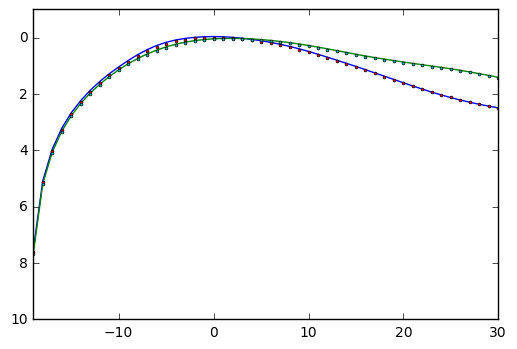

In [27]:
plt.plot(phases_h, hsiao_B)
plt.plot(phases_h, hsiao_V)
plt.plot(t_h, B_h, 'o', markersize=2)
plt.plot(t_h, V_h, 'o', markersize=2)
plt.gca().invert_yaxis()
plt.xlim([-19,30])
plt.ylim([10,-1])
plt.show()

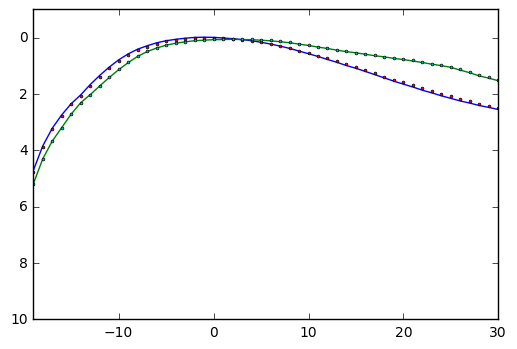

In [28]:
plt.plot(phases_n, nug_B)
plt.plot(phases_n, nug_V)
plt.plot(t_n, B_n, 'o', markersize=2)
plt.plot(t_n, V_n, 'o', markersize=2)
plt.gca().invert_yaxis()
plt.xlim([-19,30])
plt.ylim([10,-1])
plt.show()

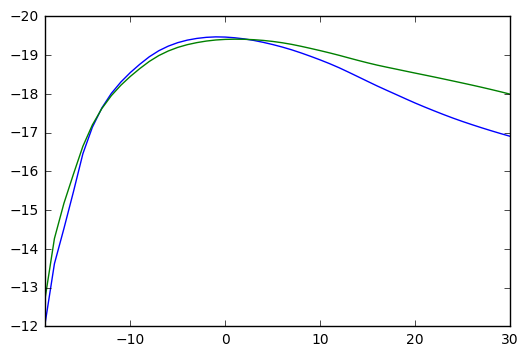

In [29]:
salt_B[0] = np.nan
salt_V[0] = np.nan
plt.plot(phases_s, salt_B)
plt.plot(phases_s, salt_V)
plt.gca().invert_yaxis()
plt.xlim([-19,30])
plt.show()

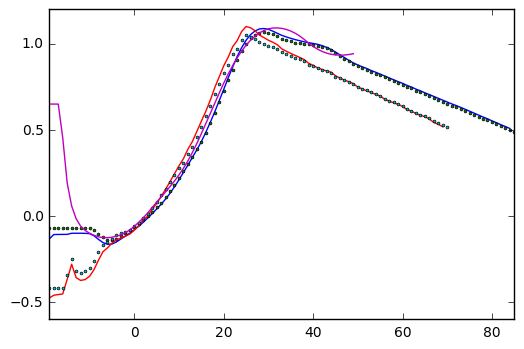

In [30]:
plt.plot(phases_h, np.asarray(hsiao_B)-np.asarray(hsiao_V))
plt.plot(t_h, np.asarray(B_h) - np.asarray(V_h), 'o', markersize=2)
plt.plot(phases_n, np.asarray(nug_B)-np.asarray(nug_V))
plt.plot(t_n, np.asarray(B_n) - np.asarray(V_n), 'o', markersize=2)
plt.plot(phases_s, np.asarray(salt_B)-np.asarray(salt_V))
plt.xlim([-19,85])
plt.show()

## Composite spectral time series for normal - Ias and non dm15 controlled

In [73]:
#changeable phase bin size
query_strings_all = ["SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN and phase < -10."]
max_phase = 60.
p1 = -10.
k = 2.
p2 = p1+k
while p1 < max_phase:
    if p1 > 30.:
        k=7
        p2=p1+4
    query_strings_all.append("SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN and phase >= %f and phase < %f"% (p1,p2))
    p1 += k
    p2 += k
print query_strings_all

['SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN and phase < -10.', 'SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN and phase >= -10.000000 and phase < -8.000000', 'SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN and phase >= -8.000000 and phase < -6.000000', 'SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN and phase >= -6.000000 and phase < -4.000000', 'SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN and phase >= -4.000000 and phase < -2.000000', 'SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN and phase >= -2.000000 and phase < 0.000000', 'SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN and phase >= 0.000000 and phase < 2.000000', 'SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN and phase >= 2.000000 and phase < 4.000000', 'SELECT

In [74]:
query_strings_dm15 = ["SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN and phase < -10. and ((dm15_source >= .95 and dm15_source < 1.15) or (dm15_from_fits >= .95 and dm15_from_fits < 1.15))"]
max_phase = 60.
p1 = -10.
k = 2.
p2 = p1+k
while p1 < max_phase:
    if p1 > 30.:
        k=7
        p2=p1+4
    query_strings_dm15.append("SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN and phase >= %f and phase < %f and ((dm15_source >= .95 and dm15_source < 1.15) or (dm15_from_fits >= .95 and dm15_from_fits < 1.15))"% (p1,p2))
    p1 += k
    p2 += k
for q in query_strings_dm15:
    print q

SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN and phase < -10. and ((dm15_source >= .95 and dm15_source < 1.15) or (dm15_from_fits >= .95 and dm15_from_fits < 1.15))
SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN and phase >= -10.000000 and phase < -8.000000 and ((dm15_source >= .95 and dm15_source < 1.15) or (dm15_from_fits >= .95 and dm15_from_fits < 1.15))
SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN and phase >= -8.000000 and phase < -6.000000 and ((dm15_source >= .95 and dm15_source < 1.15) or (dm15_from_fits >= .95 and dm15_from_fits < 1.15))
SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN and phase >= -6.000000 and phase < -4.000000 and ((dm15_source >= .95 and dm15_source < 1.15) or (dm15_from_fits >= .95 and dm15_from_fits < 1.15))
SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN and phase >= -4.000000 and phase < 

In [75]:
composites_all, sn_arrays_all, boot_sn_arrays_all = query_db.main(len(query_strings_all), query_strings_all, boot='b', medmean=1, gini_balance = True, verbose=False)

SQL Query: SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN and phase < -10.
ERROR:  2002bo_20020313_3360_7726_00.dat None
ERROR:  sn2006oa-20061116-not.dat None
172 questionable files currently ignored
Generate variance failed for:  [u'2005cf_20050601_3243_9720_00.dat']
4 questionable spectra removed 87 spectra left
0 Peculiar Ias removed 87 spectra left
74 spectra with host corrections
172 questionable files currently ignored
32 valid SNe found
Arrays cleaned
1 spectra may have telluric contamination
32 SNs with host corrections
Creating composite...
Gini balancing...
Balanced after 7 iterations
Done.
Bootstrapping
scaling boots...
computing confidence intervals...
SQL Query: SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN and phase >= -10.000000 and phase < -8.000000
ERROR:  2002bo_20020314_0_2_00.dat None
172 questionable files currently ignored
Generate variance failed for:  [u'sn2005cf-20050603-hst.flm']
6 questionabl

In [76]:
composites_dm15, sn_arrays_dm15, boot_sn_arrays_dm15 = query_db.main(len(query_strings_dm15), query_strings_dm15, boot='b', medmean=1, gini_balance = True, verbose=False)

SQL Query: SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN and phase < -10. and ((dm15_source >= .95 and dm15_source < 1.15) or (dm15_from_fits >= .95 and dm15_from_fits < 1.15))
ERROR:  2002bo_20020313_3360_7726_00.dat None
172 questionable files currently ignored
Generate variance failed for:  [u'2005cf_20050601_3243_9720_00.dat']
1 questionable spectra removed 43 spectra left
0 Peculiar Ias removed 43 spectra left
41 spectra with host corrections
172 questionable files currently ignored
15 valid SNe found
Arrays cleaned
15 spectra may have telluric contamination
15 SNs with host corrections
Creating composite...
Gini balancing...
Balanced after 10 iterations
Done.
Bootstrapping
scaling boots...
computing confidence intervals...
SQL Query: SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN and phase >= -10.000000 and phase < -8.000000 and ((dm15_source >= .95 and dm15_source < 1.15) or (dm15_from_fits >= .95 and dm15_from_f

## Average phases of each composite in time series

In [77]:
comp_phases = []
comp_B = []
comp_V = []
query_db.set_min_num_spec(composites_all, 5)
for comp in composites_all:
    Bflux = B.get_flux(comp.wavelength[comp.x1:comp.x2], comp.flux[comp.x1:comp.x2], axis = -1)
    Vflux = V.get_flux(comp.wavelength[comp.x1:comp.x2], comp.flux[comp.x1:comp.x2], axis = -1)
    Bmag = -2.5 * np.log10(Bflux) - B.Vega_zero_mag
    Vmag = -2.5 * np.log10(Vflux) - V.Vega_zero_mag
#     Bmag = -2.5 * np.log10(Bflux) - B.AB_zero_mag
#     Vmag = -2.5 * np.log10(Vflux) - V.AB_zero_mag
    comp_B.append(Bmag)
    comp_V.append(Vmag)
    comp_phases.append(np.average(comp.phase_array[comp.x1:comp.x2]))
print comp_phases
print comp_B
print comp_V

[-11.22377500921125, -8.7697109296383662, -6.9400443108160026, -5.1039701804487212, -3.0172823370587447, -1.0420596916907221, 0.96227315594232743, 2.8536002687834103, 4.8202310043936736, 6.8485118175327289, 9.03299755267469, 10.941621565671472, 12.855447108356806, 14.858276463621985, 17.069888215534803, 18.904620469885796, 20.91869032862391, 23.081660358274771, 25.128341156241724, 27.109755586418721, 28.824017212760232, 31.076616953208465, 33.789108611210828, 41.150369239447294, 48.113689187673685, 55.110098632209578]
[-20.045270725529832, -20.03761143627634, -20.032685855942042, -20.050095708281066, -20.06078696540931, -20.06552760612804, -20.07571939807497, -20.104302027030375, -20.066926642910698, -20.214783836059226, -20.086924032048639, -20.061613302473233, -19.964623190930237, -19.916500430357761, -19.865847714176731, -19.785522147165068, -19.813813269962047, -19.776280388189953, -19.632629913301788, -19.604480963096453, -19.587892385987612, -19.556007690993368, -19.5855687662157

In [78]:
comp_phases_dm15 = []
comp_B_dm15 = []
comp_V_dm15 = []
query_db.set_min_num_spec(composites_dm15, 5)
for comp in composites_dm15:
    Bflux = B.get_flux(comp.wavelength[comp.x1:comp.x2], comp.flux[comp.x1:comp.x2], axis = -1)
    Vflux = V.get_flux(comp.wavelength[comp.x1:comp.x2], comp.flux[comp.x1:comp.x2], axis = -1)
    Bmag = -2.5 * np.log10(Bflux) - B.Vega_zero_mag
    Vmag = -2.5 * np.log10(Vflux) - V.Vega_zero_mag
#     Bmag = -2.5 * np.log10(Bflux) - B.AB_zero_mag
#     Vmag = -2.5 * np.log10(Vflux) - V.AB_zero_mag
    comp_B_dm15.append(Bmag)
    comp_V_dm15.append(Vmag)
    comp_phases_dm15.append(np.average(comp.phase_array[comp.x1:comp.x2]))
print comp_phases_dm15
print comp_B_dm15
print comp_V_dm15

[-11.187821873145293, -8.9059774024367577, -6.9649255017715745, -4.9909335126304892, -2.965240673542509, -1.0493884128633284, 0.85115509125830446, 2.8046430414742671, 4.9792692685674904, 7.0751579012139318, 8.9051933100741412, 11.002911257203268, 12.905880136070687, 15.024224599839876, 17.25598803027189, 19.140360265464249, 21.243608450308532, 22.91563519032648, 25.254332965761659, 27.252735628537941, 28.69455735924776, 30.861295047240556, 33.381767811698708, 41.060952459456644, 48.433221863962423, 55.336746623085119]
[-19.942734240741718, -19.991901995532, -20.017872716098481, -20.018509296631457, -20.02086627871488, -20.016151760813699, -20.030902677328893, -20.088499225027267, -20.077667176269326, -20.046754410237771, -20.031505486524619, -20.006730403415585, -19.971938461353474, -19.90640883613225, -19.836539854655761, -19.745312576029441, -19.767796488147521, -19.750575043999984, -19.447804497420563, -19.548076360636319, -19.541413797140972, -19.602451037070125, -19.48680989231225

## Measure error on composite colors from bootstrapped templates

In [79]:
#bootstrap colors
boot_BmVs = []
for boots in boot_sn_arrays_all:
    boot_B = []
    boot_V = []
    for b in boots:
        Bflux = B.get_flux(b.wavelength[b.x1:b.x2], b.flux[b.x1:b.x2], axis = -1)
        Vflux = V.get_flux(b.wavelength[b.x1:b.x2], b.flux[b.x1:b.x2], axis = -1)
        Bmag = -2.5 * np.log10(Bflux) - B.Vega_zero_mag
        Vmag = -2.5 * np.log10(Vflux) - V.Vega_zero_mag
    #     Bmag = -2.5 * np.log10(Bflux) - B.AB_zero_mag
    #     Vmag = -2.5 * np.log10(Vflux) - V.AB_zero_mag
        boot_B.append(Bmag)
        boot_V.append(Vmag)
    BmV = np.asarray(boot_B) - np.asarray(boot_V)
    boot_BmVs.append(BmV)

In [80]:
low_errors = []
up_errors = []
boot_resids = []
percentile = erf(1/np.sqrt(2.))
low_pc = 0.5 - percentile*0.5
up_pc = 0.5 + percentile*0.5
for k in range(len(boot_sn_arrays_all)):
    resids = []
    comp_BmVs = np.asarray(comp_B[k]) - np.asarray(comp_V[k])
    resids.append(boot_BmVs[k] - comp_BmVs)
    resid_sort = np.sort(resids)[0]
    boot_resids.append(resid_sort)
    low_ind = np.round((len(resid_sort)-1) * low_pc).astype(int)
    up_ind = np.round((len(resid_sort)-1) * up_pc).astype(int)
    low_errors.append(np.absolute(resid_sort[low_ind]))
    up_errors.append(resid_sort[up_ind])
errors = [low_errors, up_errors]

In [81]:
#bootstrap colors dm15
boot_BmVs_dm15 = []
for boots in boot_sn_arrays_dm15:
    boot_B = []
    boot_V = []
    for b in boots:
        Bflux = B.get_flux(b.wavelength[b.x1:b.x2], b.flux[b.x1:b.x2], axis = -1)
        Vflux = V.get_flux(b.wavelength[b.x1:b.x2], b.flux[b.x1:b.x2], axis = -1)
        Bmag = -2.5 * np.log10(Bflux) - B.Vega_zero_mag
        Vmag = -2.5 * np.log10(Vflux) - V.Vega_zero_mag
    #     Bmag = -2.5 * np.log10(Bflux) - B.AB_zero_mag
    #     Vmag = -2.5 * np.log10(Vflux) - V.AB_zero_mag
        boot_B.append(Bmag)
        boot_V.append(Vmag)
    BmV = np.asarray(boot_B) - np.asarray(boot_V)
    boot_BmVs_dm15.append(BmV)

In [82]:
low_errors_dm15 = []
up_errors_dm15 = []
boot_resids_dm15 = []
for k in range(len(boot_sn_arrays_dm15)):
    resids = []
    comp_BmVs_dm15 = np.asarray(comp_B_dm15[k]) - np.asarray(comp_V_dm15[k])
    resids.append(boot_BmVs_dm15[k] - comp_BmVs_dm15)
    resid_sort = np.sort(resids)[0]
    boot_resids_dm15.append(resid_sort)
    low_ind = np.round((len(resid_sort)-1) * low_pc).astype(int)
    up_ind = np.round((len(resid_sort)-1) * up_pc).astype(int)
    low_errors_dm15.append(np.absolute(resid_sort[low_ind]))
    up_errors_dm15.append(resid_sort[up_ind])
errors_dm15 = [low_errors_dm15, up_errors_dm15]

In [83]:
dm15s = []
for comp in composites_all:
    dm15s.append(np.average(comp.dm15_array[comp.x1:comp.x2]))
print np.average(dm15s)
dm15s = []
for comp in composites_dm15:
    dm15s.append(np.average(comp.dm15_array[comp.x1:comp.x2]))
print np.average(dm15s)

1.14025012051
1.06160977174


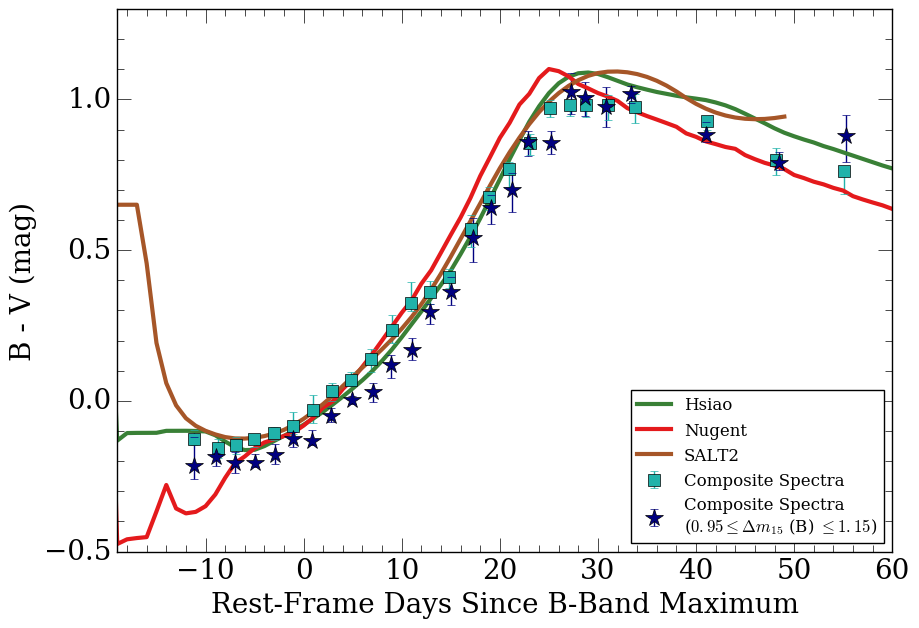

In [85]:
color_dict = {"Comp": "#000080", "Hsiao": "#398036", "Nugent": "#E41A1C", "SALT-II": "#A65628"}
plt.rc('font', family='serif')
plt.figure(num = 1, dpi = 100, figsize = [10,7])
plt.minorticks_on()
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.tick_params(
    which='major', 
    bottom='on', 
    top='on',
    left='on',
    right='on',
    length=10)
plt.tick_params(
    which='minor', 
    bottom='on', 
    top='on',
    left='on',
    right='on',
    length=5)
plt.xlabel('Rest-Frame Days Since B-Band Maximum', fontsize = 20)
plt.ylabel('B - V (mag)', fontsize = 20)
plt.plot(phases_h, np.asarray(hsiao_B)-np.asarray(hsiao_V), color = color_dict['Hsiao'], label = 'Hsiao', linewidth=3)
plt.plot(phases_n, np.asarray(nug_B)-np.asarray(nug_V), color = color_dict['Nugent'], label = 'Nugent', linewidth=3)
plt.plot(phases_s, np.asarray(salt_B)-np.asarray(salt_V), color = color_dict['SALT-II'],label='SALT2', linewidth=3)
plt.errorbar(comp_phases, np.asarray(comp_B) - np.asarray(comp_V), yerr=errors, fmt='s', markersize=8, color = "#20b2aa", label = 'Composite Spectra')
plt.errorbar(comp_phases_dm15, np.asarray(comp_B_dm15) - np.asarray(comp_V_dm15), yerr=errors_dm15, fmt='*', markersize=13, color = color_dict['Comp'], label = 'Composite Spectra \n($0.95 \leq \Delta m_{15}$ (B) $\leq 1.15$)')
plt.xlim([-19,60])
plt.ylim([-.5,1.3])
plt.legend(loc=4,numpoints=1)
plt.savefig('../../../Paper_Drafts/template_comparisons_updated/color_curve.pdf', dpi = 300, bbox_inches = 'tight')
# plt.savefig('../../../FLASH/color_curve.png', dpi = 300, bbox_inches = 'tight')
plt.show()

## Spectral feature comparison at various epochs

1.16694976714
1.10551170049
Comp v =  10997.3983334
Comp r =  0.257580954741
Comp v =  11095.1566954
Comp r =  0.171057076895
Hsiao v =  10997.3983334
Hsiao r =  0.257793046626
Nugent v =  12270.5626583
Nugent r =  0.170290100783
SALT2 v =  11290.7621201
SALT2 r =  0.159287833962


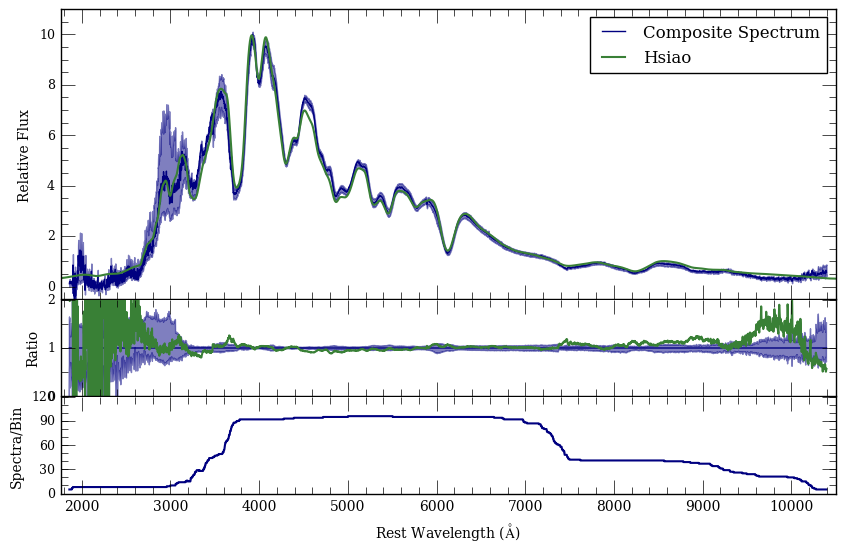

In [23]:
query_db.set_min_num_spec(composites, 5)
comps_and_temps = []
for comp in composites:
    comps_and_temps.append(comp)
srange = np.where((s_template.wavelength > 2000.) & (s_template.wavelength < 9200))[0]
s_template.x1 = srange[0]
s_template.x2 = srange[-1]
comps_and_temps.append(h_template)
comps_and_temps.append(n_template)
comps_and_temps.append(s_template)
comps_and_temps, scales = composite.optimize_scales(comps_and_temps, comps_and_temps[2], True)

print np.average(comps_and_temps[0].dm15_array[comps_and_temps[0].x1:comps_and_temps[0].x2])
print np.average(comps_and_temps[1].dm15_array[comps_and_temps[1].x1:comps_and_temps[1].x2])
comps_and_temps[0].name = "Comp"
comps_and_temps[1].name = "Comp"
comps_and_temps[2].name = "Hsiao"
comps_and_temps[3].name = "Nugent"
comps_and_temps[4].name = "SALT2"
for comp in comps_and_temps:
    v_strong, si_min_wave = sa.measure_velocity(comp.wavelength[comp.x1:comp.x2],comp.flux[comp.x1:comp.x2], 5900., 6300.)
    print comp.name, 'v = ', v_strong
    r = sa.measure_si_ratio(comp.wavelength[comp.x1:comp.x2], comp.flux[comp.x1:comp.x2], vexp = .002, plot=False)
    print comp.name, 'r = ', r
query_db.scaled_plot([comps_and_temps[0], comps_and_temps[2]],include_spec_bin=True, legend_labels = ["Composite Spectrum", "Hsiao",])

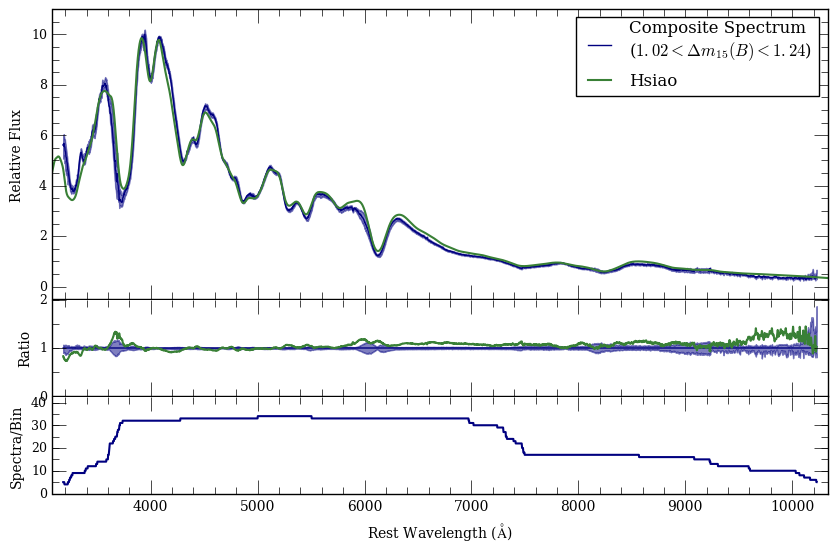

In [56]:
query_db.scaled_plot([comps_and_temps[1], comps_and_temps[2]], include_spec_bin=True, legend_labels = ["Composite Spectrum \n($ 1.02 < \Delta m_{15} (B) < 1.24$)", "Hsiao",])

query_db.py:663: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  comp.low_conf = norm*comp.low_conf
query_db.py:664: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  comp.up_conf = norm*comp.up_conf


[-30.0, 0.0, 30.0, 60.0, 90.0, '', 150.0]


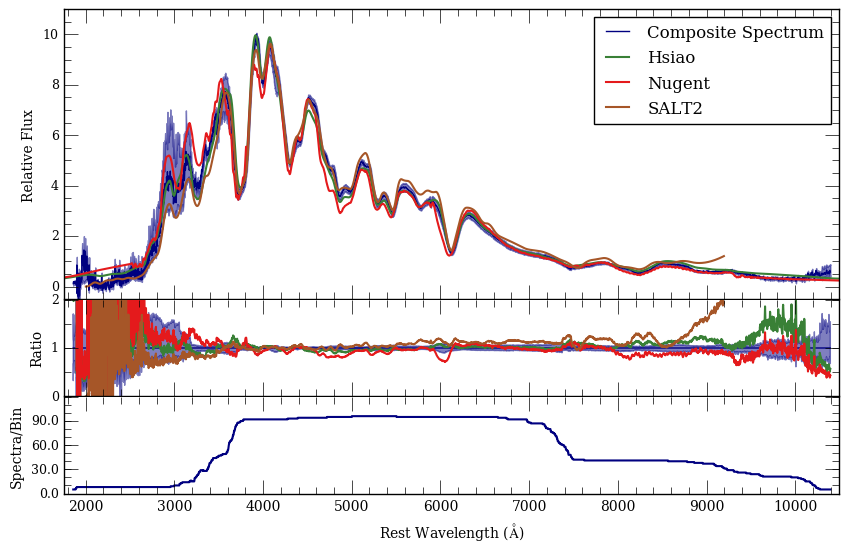

In [60]:
query_db.scaled_plot([comps_and_temps[0], comps_and_temps[2], comps_and_temps[3], comps_and_temps[4]], include_spec_bin=True, legend_labels = ["Composite Spectrum", "Hsiao", "Nugent","SALT2"], rm_last_label=True, savename = 'template_comparisons_updated/temp_max_light_all')
# query_db.scaled_plot([comps_and_temps[0], comps_and_temps[2], comps_and_temps[3], comps_and_temps[4]], include_spec_bin=True, legend_labels = ["Composite Spectrum", "Hsiao", "Nugent","SALT2"])

[-10.0, 0.0, 10.0, 20.0, 30.0, '', 50.0]


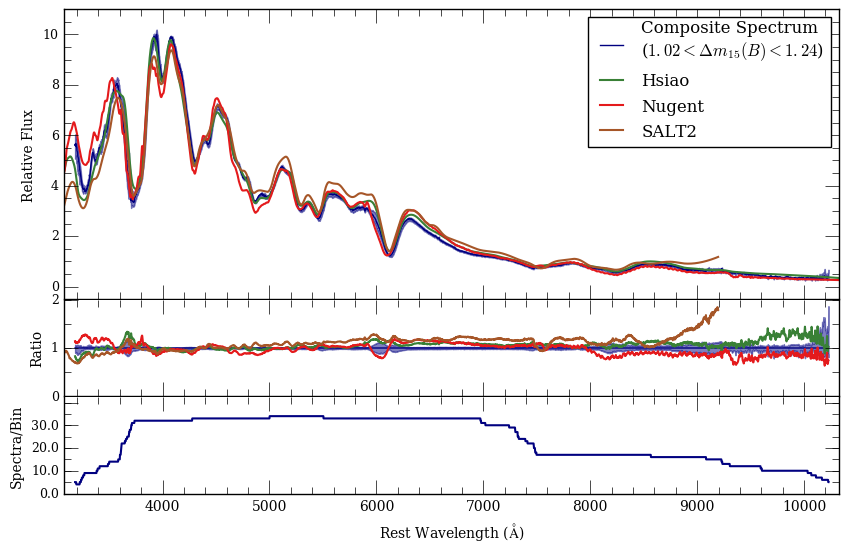

In [61]:
# query_db.scaled_plot([comps_and_temps[1], comps_and_temps[2], comps_and_temps[3], comps_and_temps[4]], include_spec_bin=True, savename = 'max_light_temp_comparison_dm15')
query_db.scaled_plot([comps_and_temps[1], comps_and_temps[2], comps_and_temps[3], comps_and_temps[4]], include_spec_bin=True, rm_last_label=True, legend_labels = ["Composite Spectrum \n($ 1.02 < \Delta m_{15} (B) < 1.24$)", "Hsiao", "Nugent","SALT2"], savename = 'template_comparisons_updated/temp_max_light_dm15')
# query_db.scaled_plot([comps_and_temps[1], comps_and_temps[2], comps_and_temps[3], comps_and_temps[4]], include_spec_bin=True, legend_labels = ["Composite Spectrum \n($ 1.02 < \Delta m_{15} (B) < 1.24$)", "Hsiao", "Nugent","SALT2"])

query_db.py:213: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  labels[-2]=''


[-30.0, 0.0, 30.0, 60.0, 90.0, '', 150.0]


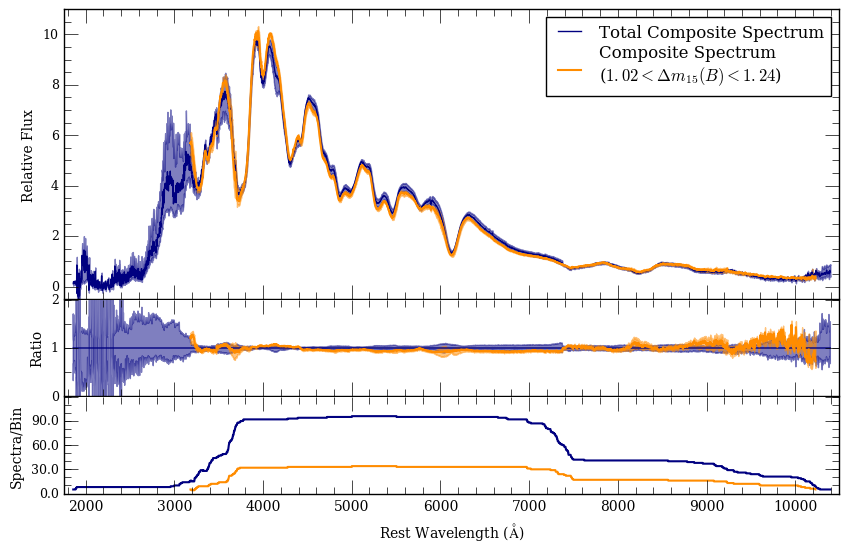

In [53]:
comps_and_temps[1].name = "Comp2"
query_db.scaled_plot([comps_and_temps[0], comps_and_temps[1]], include_spec_bin=True, rm_last_label=True, legend_labels = ["Total Composite Spectrum","Composite Spectrum \n($ 1.02 < \Delta m_{15} (B) < 1.24$)"], savename = 'template_comparisons_updated/max_light_total_bin_comp')

In [23]:
wave_h_1week = []
flux_h_1week = []
for i, phase in enumerate(phase_h):
    if float(phase) == 7.0:
        wave_h_1week.append(wavelength_hsiao[i])
        flux_h_1week.append(flux_hsiao[i])

In [24]:
wave_interp_h_1week = np.arange(1000., 12000., dtype=int, step=2)
flux_spl_h_1week = inter.splrep(wave_h_1week, flux_h_1week)
flux_interp_h_1week = inter.splev(wave_interp_h_1week, flux_spl_h_1week, ext = 3)
h_template_1week = composite.supernova(wave_interp_h_1week, flux_interp_h_1week)
h_template_1week.phase_array = np.zeros(len(flux_interp_h_1week))

In [25]:
wave_n_1week = []
flux_n_1week = []
for i, phase in enumerate(epoch_n):
    if float(phase) == 27.0:
        wave_n_1week.append(wavelength_nugent[i])
        flux_n_1week.append(flux_nugent[i])

In [26]:
wave_interp_n_1week = np.arange(1000., 12000., dtype=int, step=2)
flux_spl_n_1week = inter.splrep(wave_n_1week, flux_n_1week)
flux_interp_n_1week = inter.splev(wave_interp_n_1week, flux_spl_n_1week, ext = 3)
n_template_1week = composite.supernova(wave_interp_n_1week,flux_interp_n_1week)
n_template_1week.phase_array = np.zeros(len(flux_interp_n_1week))

In [27]:
wave_s_1week = []
flux_s_1week = []
for i, phase in enumerate(phase_s):
    if float(phase) == 7.0:
        wave_s_1week.append(wavelength_salt[i])
        flux_s_1week.append(flux_salt[i])

In [28]:
wave_interp_s_1week = np.arange(1000., 12000., dtype=int, step=2)
flux_spl_s_1week = inter.splrep(wave_s_1week, flux_s_1week)
flux_interp_s_1week = inter.splev(wave_interp_s_1week, flux_spl_s_1week, ext = 3)
s_template_1week = composite.supernova(wave_interp_s_1week,flux_interp_s_1week)
s_template_1week.phase_array = np.zeros(len(flux_interp_s_1week))

In [29]:
query_1week = ["SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN and phase >= 6 and phase < 8",
         "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= 6 and phase <= 8 and ((dm15_source >= 1. and dm15_source < 1.2) or (dm15_from_fits >= 1. and dm15_from_fits < 1.2)) and Supernovae.SN !='2002bf'"]

In [30]:
composites_1week, sn_arrays_1week, boot_sn_arrays_1week = query_db.main(len(query_1week), query_1week, boot='b', medmean=1, gini_balance=True, verbose=False)

SQL Query: SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN and phase >= 6 and phase < 8
172 questionable files currently ignored
20 questionable spectra removed 177 spectra left
3 Peculiar Ias removed 174 spectra left
140 spectra with host corrections
172 questionable files currently ignored
99 valid SNe found
Arrays cleaned
3 spectra may have telluric contamination
99 SNs with host corrections
Creating composite...
Gini balancing...
Balanced after 10 iterations
Done.
Bootstrapping
scaling boots...
computing confidence intervals...
SQL Query: SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= 6 and phase <= 8 and ((dm15_source >= 1. and dm15_source < 1.2) or (dm15_from_fits >= 1. and dm15_from_fits < 1.2)) and Supernovae.SN !='2002bf'
172 questionable files currently ignored
6 questionable spectra removed 46 spectra left
0 Peculiar Ias removed 46 spectra left
42 spectra with host corrections
172 questionable fi

1.14855852773
1.09398934165
Comp v =  10899.6695413 6128.0
Comp v =  10899.6695413 6128.0
Hsiao v =  10899.6695413 6128
Nugent v =  10606.6606057 6134
SALT2 v =  10801.9703211 6130
[-30.0, 0.0, 30.0, 60.0, 90.0, '', 150.0]


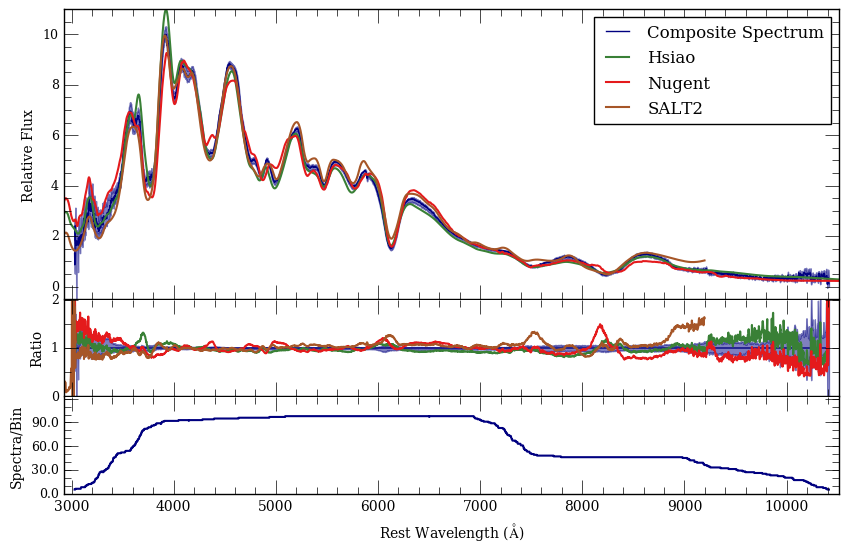

In [63]:
query_db.set_min_num_spec(composites_1week, 5)

comps_and_temps = []
for comp in composites_1week:
    comps_and_temps.append(comp)

srange = np.where((s_template_1week.wavelength > 2000.) & (s_template_1week.wavelength < 9200))[0]
s_template_1week.x1 = srange[0]
s_template_1week.x2 = srange[-1]

comps_and_temps.append(h_template_1week)
comps_and_temps.append(n_template_1week)
comps_and_temps.append(s_template_1week)
comps_and_temps, scales = composite.optimize_scales(comps_and_temps, comps_and_temps[0], True)

print np.average(comps_and_temps[0].dm15_array[comps_and_temps[1].x1:comps_and_temps[1].x2])
print np.average(comps_and_temps[1].dm15_array[comps_and_temps[1].x1:comps_and_temps[1].x2])
comps_and_temps[0].name = "Comp"
comps_and_temps[1].name = "Comp"
comps_and_temps[2].name = "Hsiao"
comps_and_temps[3].name = "Nugent"
comps_and_temps[4].name = "SALT2"
for comp in comps_and_temps:
    v_strong, si_min_wave = sa.measure_velocity(comp.wavelength[comp.x1:comp.x2],comp.flux[comp.x1:comp.x2], 5900., 6300.)
    print comp.name, 'v = ', v_strong, si_min_wave
query_db.scaled_plot([comps_and_temps[0], comps_and_temps[2], comps_and_temps[3], comps_and_temps[4]], include_spec_bin=True, 
                     legend_labels = ["Composite Spectrum", "Hsiao", "Nugent","SALT2"], rm_last_label=True,
                     savename = 'template_comparisons_updated/temp_p7_all')
# query_db.scaled_plot([comps_and_temps[0], comps_and_temps[2], comps_and_temps[3], comps_and_temps[4]], legend_labels = ["Composite Spectrum", "Hsiao", "Nugent","SALT2"])

[-10.0, 0.0, 10.0, 20.0, 30.0, '', 50.0]


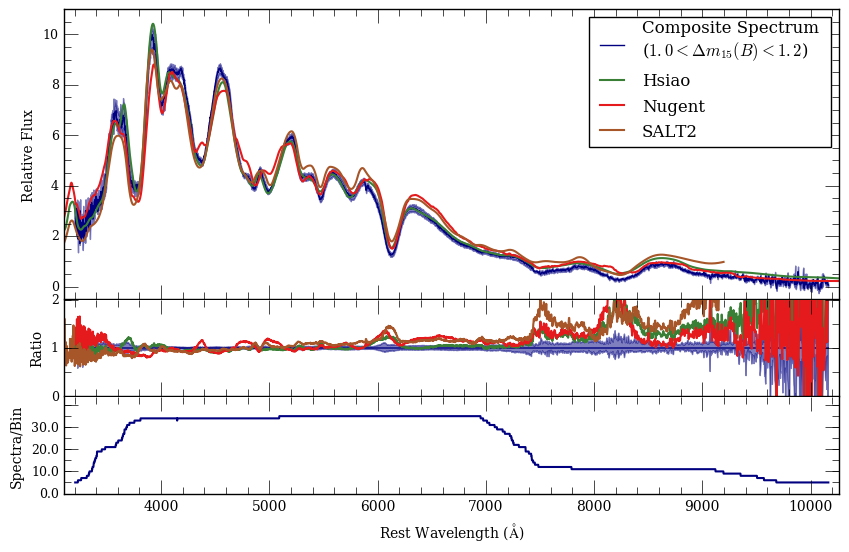

In [64]:
query_db.scaled_plot([comps_and_temps[1], comps_and_temps[2], comps_and_temps[3], comps_and_temps[4]], include_spec_bin=True, 
                     legend_labels = ["Composite Spectrum \n($ 1.0 < \Delta m_{15} (B) < 1.2$)", "Hsiao", "Nugent","SALT2"],
                     rm_last_label=True,
                     savename = 'template_comparisons_updated/temp_p7_dm15')
# query_db.scaled_plot([comps_and_temps[1], comps_and_temps[2], comps_and_temps[3], comps_and_temps[4]], legend_labels = ["Composite Spectrum \n($ 1.0 < \Delta m_{15} (B) < 1.2$)", "Hsiao", "Nugent","SALT2"])

In [32]:
wave_h_m1week = []
flux_h_m1week = []
for i, phase in enumerate(phase_h):
    if float(phase) == -7.0:
        wave_h_m1week.append(wavelength_hsiao[i])
        flux_h_m1week.append(flux_hsiao[i])

In [33]:
wave_interp_h_m1week = np.arange(1000., 12000., dtype=int, step=2)
flux_spl_h_m1week = inter.splrep(wave_h_m1week, flux_h_m1week)
flux_interp_h_m1week = inter.splev(wave_interp_h_m1week, flux_spl_h_m1week, ext = 3)
h_template_m1week = composite.supernova(wave_interp_h_m1week, flux_interp_h_m1week)
h_template_m1week.phase_array = np.zeros(len(flux_interp_h_m1week))

In [34]:
wave_n_m1week = []
flux_n_m1week = []
for i, phase in enumerate(epoch_n):
    if float(phase) == 13.0:
        wave_n_m1week.append(wavelength_nugent[i])
        flux_n_m1week.append(flux_nugent[i])

In [35]:
wave_interp_n_m1week = np.arange(1000., 12000., dtype=int, step=2)
flux_spl_n_m1week = inter.splrep(wave_n_m1week, flux_n_m1week)
flux_interp_n_m1week = inter.splev(wave_interp_n_m1week, flux_spl_n_m1week, ext = 3)
n_template_m1week = composite.supernova(wave_interp_n_m1week, flux_interp_n_m1week)
n_template_m1week.phase_array = np.zeros(len(flux_interp_n_m1week))

In [36]:
wave_s_m1week = []
flux_s_m1week = []
for i, phase in enumerate(phase_s):
    if float(phase) == -7.0:
        wave_s_m1week.append(wavelength_salt[i])
        flux_s_m1week.append(flux_salt[i])

In [37]:
wave_interp_s_m1week = np.arange(1000., 12000., dtype=int, step=2)
flux_spl_s_m1week = inter.splrep(wave_s_m1week, flux_s_m1week)
flux_interp_s_m1week = inter.splev(wave_interp_s_m1week, flux_spl_s_m1week, ext = 3)
s_template_m1week = composite.supernova(wave_interp_s_m1week, flux_interp_s_m1week)
s_template_m1week.phase_array = np.zeros(len(flux_interp_s_m1week))

In [38]:
query_m1week = ["SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN and phase >= -8 and phase < -6",
         "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -8 and phase <= -6 and ((dm15_source >= .98 and dm15_source < 1.18) or (dm15_from_fits >= .98 and dm15_from_fits < 1.18)) and Supernovae.SN !='2002bf'"]

In [39]:
composites_m1week, sn_arrays_m1week, boot_sn_arrays_m1week = query_db.main(len(query_m1week), query_m1week, boot='b', medmean=1, gini_balance=True, verbose=False)

SQL Query: SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN and phase >= -8 and phase < -6
172 questionable files currently ignored
Generate variance failed for:  [u'sn2005cf-20050605-hst.flm', u'sn2005m-20050128-hst.flm']
10 questionable spectra removed 148 spectra left
2 Peculiar Ias removed 146 spectra left
106 spectra with host corrections
172 questionable files currently ignored
67 valid SNe found
Arrays cleaned
1 spectra may have telluric contamination
67 SNs with host corrections
Creating composite...
Gini balancing...
Balanced after 11 iterations
Done.
Bootstrapping
scaling boots...
computing confidence intervals...
SQL Query: SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -8 and phase <= -6 and ((dm15_source >= .98 and dm15_source < 1.18) or (dm15_from_fits >= .98 and dm15_from_fits < 1.18)) and Supernovae.SN !='2002bf'
172 questionable files currently ignored
Generate variance failed for:  [u'sn200

dm15:
1.10885390425
1.07124913215
phase:
-6.94672578876
-6.92899087054
Comp v =  12761.5708032
Comp v =  13056.5300302
Hsiao v =  11682.3277084
Nugent v =  11486.4857972
SALT2 v =  12663.3101106
[-20.0, 0.0, 20.0, 40.0, 60.0, '', 100.0]


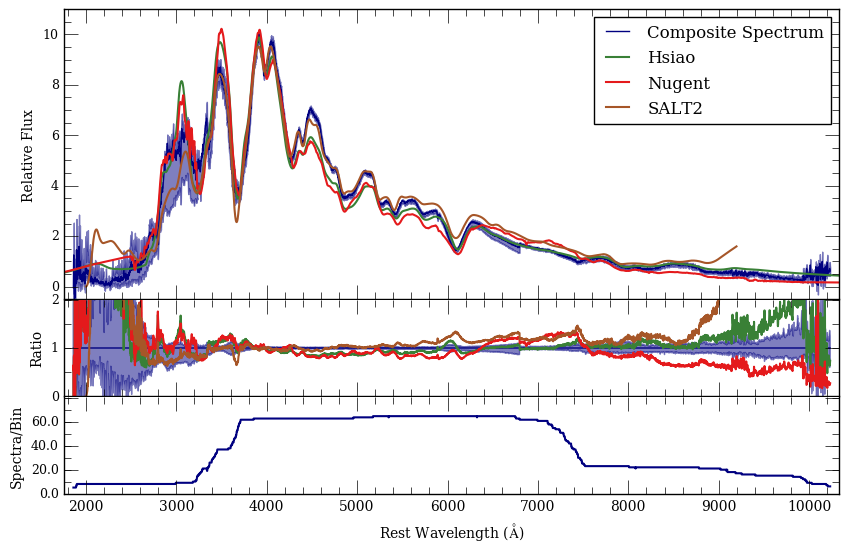

In [66]:
query_db.set_min_num_spec(composites_m1week, 5)
comps_and_temps = []
for comp in composites_m1week:
    comps_and_temps.append(comp)
    
srange = np.where((s_template_m1week.wavelength > 2000.) & (s_template_m1week.wavelength < 9200))[0]
s_template_m1week.x1 = srange[0]
s_template_m1week.x2 = srange[-1]

comps_and_temps.append(h_template_m1week)
comps_and_temps.append(n_template_m1week)
comps_and_temps.append(s_template_m1week)
comps_and_temps, scales = composite.optimize_scales(comps_and_temps, comps_and_temps[0], True)

print 'dm15:'
print np.average(comps_and_temps[0].dm15_array[comps_and_temps[1].x1:comps_and_temps[1].x2])
print np.average(comps_and_temps[1].dm15_array[comps_and_temps[1].x1:comps_and_temps[1].x2])
print 'phase:'
print np.average(comps_and_temps[0].phase_array[comps_and_temps[1].x1:comps_and_temps[1].x2])
print np.average(comps_and_temps[1].phase_array[comps_and_temps[1].x1:comps_and_temps[1].x2])
comps_and_temps[0].name = "Comp"
comps_and_temps[1].name = "Comp"
comps_and_temps[2].name = "Hsiao"
comps_and_temps[3].name = "Nugent"
comps_and_temps[4].name = "SALT2"
for comp in comps_and_temps:
    v_strong, si_min_wave = sa.measure_velocity(comp.wavelength[comp.x1:comp.x2],comp.flux[comp.x1:comp.x2], 5900., 6300.)
    print comp.name, 'v = ', v_strong
query_db.scaled_plot([comps_and_temps[0], comps_and_temps[2], comps_and_temps[3], comps_and_temps[4]], include_spec_bin=True, 
                     legend_labels = ["Composite Spectrum", "Hsiao", "Nugent","SALT2"], 
                     rm_last_label=True,
                     savename = 'template_comparisons_updated/temp_m7_all')
# query_db.scaled_plot([comps_and_temps[0], comps_and_temps[2], comps_and_temps[3], comps_and_temps[4]], legend_labels = ["Composite Spectrum", "Hsiao", "Nugent","SALT2"])

[-10.0, 0.0, 10.0, 20.0, '', 40.0]


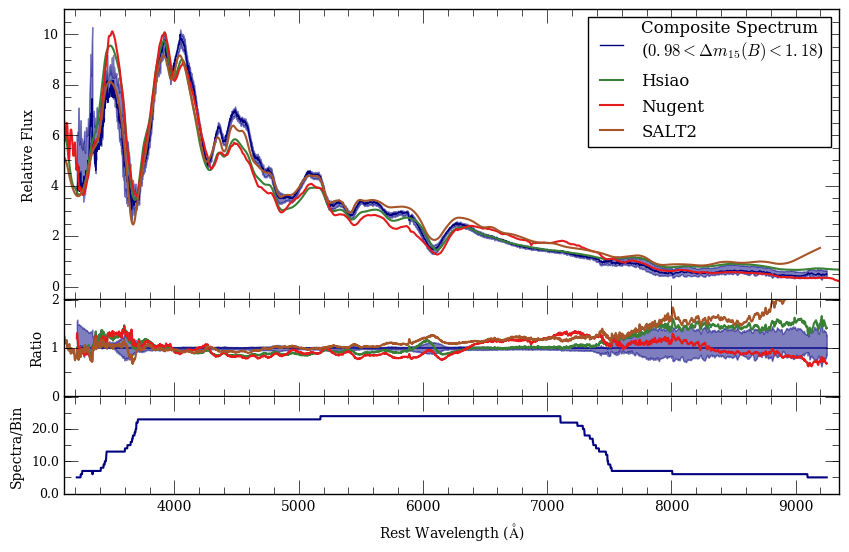

In [67]:
query_db.scaled_plot([comps_and_temps[1], comps_and_temps[2], comps_and_temps[3], comps_and_temps[4]], include_spec_bin=True, 
                     legend_labels = ["Composite Spectrum \n($ 0.98 < \Delta m_{15} (B) < 1.18$)", "Hsiao", "Nugent","SALT2"], 
                     rm_last_label=True,
                     savename = 'template_comparisons_updated/temp_m7_dm15')
# query_db.scaled_plot([comps_and_temps[1], comps_and_temps[2], comps_and_temps[3], comps_and_temps[4]], legend_labels = ["Composite Spectrum \n($ 0.98 < \Delta m_{15} (B) < 1.18$)", "Hsiao", "Nugent","SALT2"])

In [69]:
wave_h_1month = []
flux_h_1month = []
for i, phase in enumerate(phase_h):
    if float(phase) == 30.0:
        wave_h_1month.append(wavelength_hsiao[i])
        flux_h_1month.append(flux_hsiao[i])

In [70]:
wave_interp_h_1month = np.arange(1000., 12000., dtype=int, step=2)
flux_spl_h_1month = inter.splrep(wave_h_1month, flux_h_1month)
flux_interp_h_1month = inter.splev(wave_interp_h_1month, flux_spl_h_1month, ext = 3)
h_template_1month = composite.supernova(wave_interp_h_1month, flux_interp_h_1month)
h_template_1month.phase_array = np.zeros(len(flux_interp_h_1month))

In [71]:
wave_n_1month = []
flux_n_1month = []
for i, phase in enumerate(epoch_n):
    if float(phase) == 50.0:
        wave_n_1month.append(wavelength_nugent[i])
        flux_n_1month.append(flux_nugent[i])

In [72]:
wave_interp_n_1month = np.arange(1000., 12000., dtype=int, step=2)
flux_spl_n_1month = inter.splrep(wave_n_1month, flux_n_1month)
flux_interp_n_1month = inter.splev(wave_interp_n_1month, flux_spl_n_1month, ext = 3)
n_template_1month = composite.supernova(wave_interp_n_1month, flux_interp_n_1month)
n_template_1month.phase_array = np.zeros(len(flux_interp_n_1month))

In [73]:
wave_s_1month = []
flux_s_1month = []
for i, phase in enumerate(phase_s):
    if float(phase) == 30.0:
        wave_s_1month.append(wavelength_salt[i])
        flux_s_1month.append(flux_salt[i])

In [74]:
wave_interp_s_1month = np.arange(1000., 12000., dtype=int, step=2)
flux_spl_s_1month = inter.splrep(wave_s_1month, flux_s_1month)
flux_interp_s_1month = inter.splev(wave_interp_s_1month, flux_spl_s_1month, ext = 3)
s_template_1month = composite.supernova(wave_interp_s_1month, flux_interp_s_1month)
s_template_1month.phase_array = np.zeros(len(flux_interp_s_1month))

In [75]:
query_1month = ["SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN and phase >= 28 and phase < 32",
         "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= 28 and phase <= 32 and ((dm15_source >= 1.0 and dm15_source < 1.2) or (dm15_from_fits >= 1.0 and dm15_from_fits < 1.2)) and Supernovae.SN !='2002bf'"]

In [76]:
composites_1month, sn_arrays_1month, boot_sn_arrays_tmonth = query_db.main(len(query_1month), query_1month, boot='b', medmean=1, gini_balance=True, verbose=False)

SQL Query: SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN and phase >= 28 and phase < 32
ERROR:  2002bo_20020421_0_2_00.dat None
172 questionable files currently ignored
8 questionable spectra removed 150 spectra left
4 Peculiar Ias removed 146 spectra left
125 spectra with host corrections
172 questionable files currently ignored
89 valid SNe found
Arrays cleaned
4 spectra may have telluric contamination
89 SNs with host corrections
Creating composite...
Gini balancing...
Balanced after 12 iterations
Done.
Bootstrapping
scaling boots...
computing confidence intervals...
SQL Query: SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= 28 and phase <= 32 and ((dm15_source >= 1.0 and dm15_source < 1.2) or (dm15_from_fits >= 1.0 and dm15_from_fits < 1.2)) and Supernovae.SN !='2002bf'
ERROR:  2002bo_20020421_0_2_00.dat None
172 questionable files currently ignored
6 questionable spectra removed 56 spectra left
0 Pecu

dm15:
1.18333168381
1.08366708237
phase:
29.7997267406
29.809989554


query_db.py:663: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  comp.low_conf = norm*comp.low_conf
query_db.py:664: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  comp.up_conf = norm*comp.up_conf


[-20.0, 0.0, 20.0, 40.0, 60.0, 80.0, '', 120.0]


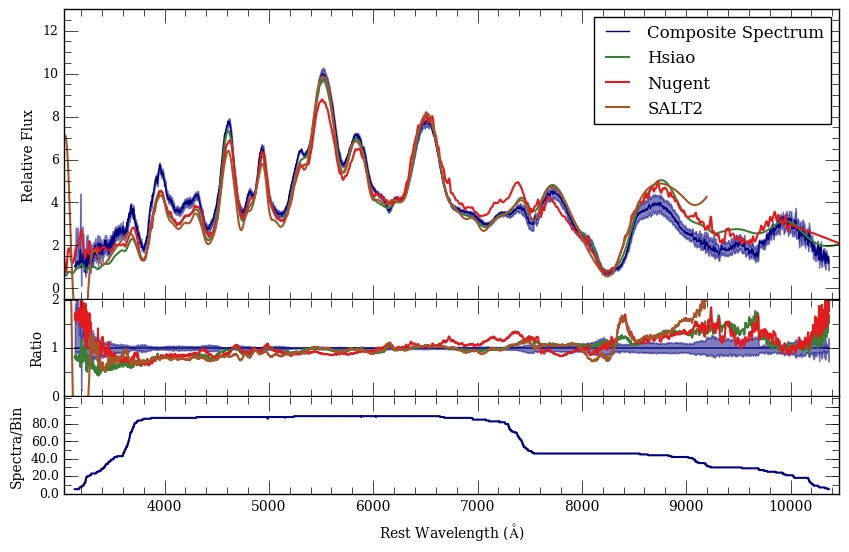

In [77]:
query_db.set_min_num_spec(composites_1month, 5)
comps_and_temps = []
for comp in composites_1month:
    comps_and_temps.append(comp)

srange = np.where((s_template_1month.wavelength > 2000.) & (s_template_1month.wavelength < 9200))[0]
s_template_1month.x1 = srange[0]
s_template_1month.x2 = srange[-1]

comps_and_temps.append(h_template_1month)
comps_and_temps.append(n_template_1month)
comps_and_temps.append(s_template_1month)
comps_and_temps, scales = composite.optimize_scales(comps_and_temps, comps_and_temps[0], True)

print 'dm15:'
print np.average(comps_and_temps[0].dm15_array[comps_and_temps[1].x1:comps_and_temps[1].x2])
print np.average(comps_and_temps[1].dm15_array[comps_and_temps[1].x1:comps_and_temps[1].x2])
print 'phase:'
print np.average(comps_and_temps[0].phase_array[comps_and_temps[1].x1:comps_and_temps[1].x2])
print np.average(comps_and_temps[1].phase_array[comps_and_temps[1].x1:comps_and_temps[1].x2])
comps_and_temps[0].name = "Comp"
comps_and_temps[1].name = "Comp"
comps_and_temps[2].name = "Hsiao"
comps_and_temps[3].name = "Nugent"
comps_and_temps[4].name = "SALT2"
query_db.scaled_plot([comps_and_temps[0], comps_and_temps[2], comps_and_temps[3], comps_and_temps[4]], include_spec_bin=True, 
                     legend_labels = ["Composite Spectrum", "Hsiao", "Nugent","SALT2"], 
                     rm_last_label=True,
                     savename = 'template_comparisons_updated/temp_p30_all')
# query_db.scaled_plot([comps_and_temps[0], comps_and_temps[2], comps_and_temps[3], comps_and_temps[4]], legend_labels = ["Composite Spectrum", "Hsiao", "Nugent","SALT2"])

[-10.0, 0.0, 10.0, 20.0, 30.0, '', 50.0]


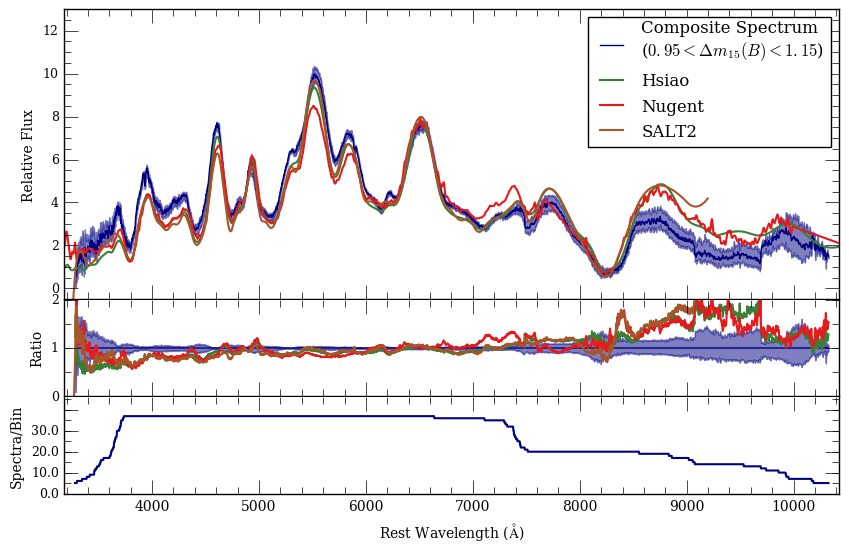

In [78]:
query_db.scaled_plot([comps_and_temps[1], comps_and_temps[2], comps_and_temps[3], comps_and_temps[4]], include_spec_bin=True, 
                     legend_labels = ["Composite Spectrum \n($ 0.95 < \Delta m_{15} (B) < 1.15$)", "Hsiao", "Nugent","SALT2"], 
                     rm_last_label=True,
                     savename = 'template_comparisons_updated/temp_p30_dm15')
# query_db.scaled_plot([comps_and_temps[1], comps_and_temps[2], comps_and_temps[3], comps_and_temps[4]], legend_labels = ["Composite Spectrum \n($ 0.95 < \Delta m_{15} (B) < 1.15$)", "Hsiao", "Nugent","SALT2"])

## 91t and 91bg nugent maximum light comparisons

In [79]:
query_91t = ["SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -1 and phase <= 1 and ((dm15_source <= .9) or (dm15_from_fits <= .9)) and Supernovae.SN !='2002bf'"]

In [80]:
composites_91t, sn_arrays_91t, boot_sn_arrays_91t = query_db.main(len(query_91t), query_91t, boot='b', medmean=1, verbose=False)

SQL Query: SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -1 and phase <= 1 and ((dm15_source <= .9) or (dm15_from_fits <= .9)) and Supernovae.SN !='2002bf'
167 questionable files currently ignored
0 questionable spectra removed 22 spectra left
0 Peculiar Ias removed 22 spectra left
22 spectra with host corrections
167 questionable files currently ignored
14 valid SNe found
Arrays cleaned
14 spectra may have telluric contamination
14 SNs with host corrections
Creating composite...
Done.
Bootstrapping
scaling boots...
computing confidence intervals...


In [81]:
query_db.set_min_num_spec(composites_91t, 5)

0.843894858993


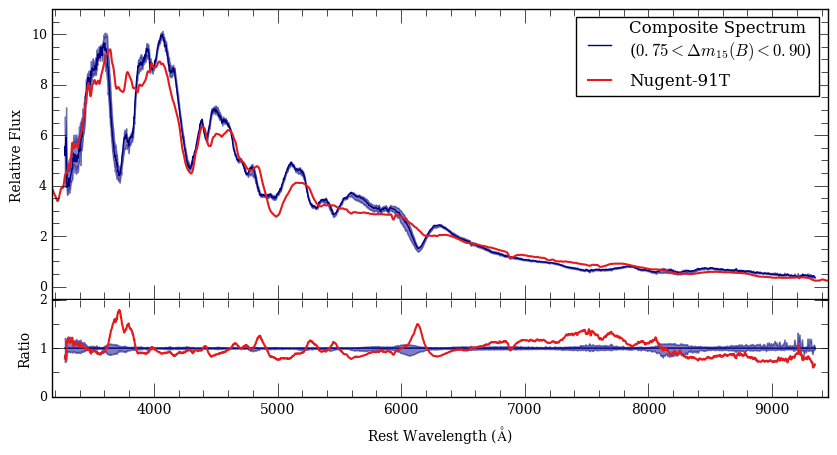

In [82]:
comps_and_temps = []
for comp in composites_91t:
    comps_and_temps.append(comp)
comps_and_temps.append(n_template_91t)
comps_and_temps, scales = composite.optimize_scales(comps_and_temps, comps_and_temps[1], True)

print np.average(comps_and_temps[0].dm15_array[comps_and_temps[0].x1:comps_and_temps[0].x2])
comps_and_temps[0].name = "Comp"
comps_and_temps[1].name = "Nugent"
query_db.scaled_plot([comps_and_temps[0], comps_and_temps[1]], legend_labels = ["Composite Spectrum \n($ 0.75 < \Delta m_{15} (B) < 0.90$)", "Nugent-91T"])

In [70]:
query_91bg = ["SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -3 and phase <= 3 and ((dm15_source >= 1.8) or (dm15_from_fits >= 1.8)) and Supernovae.SN !='2002bf'"]

In [71]:
composites_91bg, sn_arrays_91bg, boot_sn_arrays_91bg = query_db.main(len(query_91bg), query_91bg, boot='b', medmean=1, verbose=False)

SQL Query: SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -3 and phase <= 3 and ((dm15_source >= 1.8) or (dm15_from_fits >= 1.8)) and Supernovae.SN !='2002bf'
172 questionable files currently ignored
6 questionable spectra removed 29 spectra left
1 Peculiar Ias removed 28 spectra left
23 spectra with host corrections
172 questionable files currently ignored
10 valid SNe found
Arrays cleaned
10 spectra may have telluric contamination
10 SNs with host corrections
Creating composite...
Done.
Bootstrapping
scaling boots...
computing confidence intervals...


1.91399447567
[-2.0, 0.0, 2.0, 4.0, 6.0, 8.0, 10.0, '', 14.0]


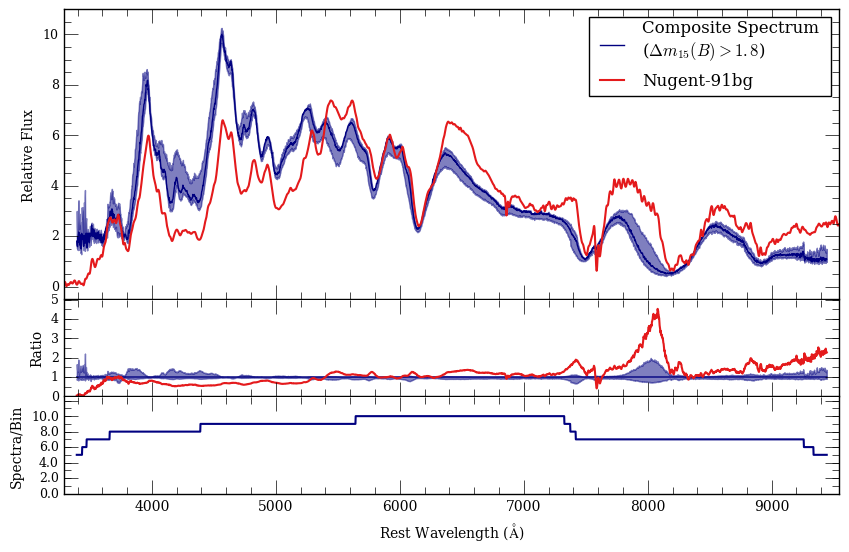

In [72]:
query_db.set_min_num_spec(composites_91bg, 5)
comps_and_temps = []
for comp in composites_91bg:
    comps_and_temps.append(comp)
comps_and_temps.append(n_template_91bg)
comps_and_temps, scales = composite.optimize_scales(comps_and_temps, comps_and_temps[1], True)

print np.average(comps_and_temps[0].dm15_array[comps_and_temps[0].x1:comps_and_temps[0].x2])
comps_and_temps[0].name = "Comp"
comps_and_temps[1].name = "Nugent"
query_db.scaled_plot([comps_and_temps[0], comps_and_temps[1]], include_spec_bin=True, 
                     legend_labels = ["Composite Spectrum \n($\Delta m_{15} (B) > 1.8$)", "Nugent-91bg"], 
                     rm_last_label=True, expand_ratio=True,
                     savename = 'template_comparisons_updated/temp_max_light_91bg')
# query_db.scaled_plot([comps_and_temps[0], comps_and_temps[1]], legend_labels = ["Composite Spectrum \n($\Delta m_{15} (B) > 1.8$)", "Nugent-91bg"])